<a href="https://colab.research.google.com/github/jminango20/ObtencionTablasDesdeWeb/blob/master/Obtencion_Tabla_Web.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Obtención Tablas de la Web

Este tutorial muestra la forma de obtención de tablas de sitios web. Para este objetivo realizaremos el análisis de datos de la Copa del Mundo para lo cuál tendremos como base de obtención de los datos la página web de Wikipedia en inglés, puesto que aqui aparecen la tabla de interés que vamos a trabajar.

Para accesar a la página web acceda al siguiente enlace: [Copa Mundo ](https://en.wikipedia.org/wiki/FIFA_World_Cup)

In [ ]:
#Importando las bibliotecas
import pandas as pd
import numpy as np
import requests

In [ ]:
#Obtención de la URL
url = 'https://en.wikipedia.org/wiki/FIFA_World_Cup' #Traigo la página completa
respuesta = requests.get(url) 
#Mostrar en formato html la página web
#respuesta.text

In [ ]:
# Transformo a tablas el formato HTML
tabla = pd.read_html(respuesta.text)
# Imprimo lo que tiene mi tabla -- Todas las tablas de la página web fueron convertidas a DataFrame
tabla

[                                   0                                  1
 0                                NaN                                NaN
 1                            Founded                 1930; 90 years ago
 2                             Region               International (FIFA)
 3                    Number of teams              32 (tournament phase)
 4                  Current champions                 France (2nd title)
 5            Most successful team(s)                  Brazil (5 titles)
 6            Television broadcasters               List of broadcasters
 7                            Website             www.fifa.com/worldcup/
 8  2022 FIFA World Cup qualification  2022 FIFA World Cup qualification,
                                                    0                                                  1
 0                France, the current world champions                France, the current world champions
 1                                        Tournaments      

In [ ]:
#Quiero solamente la tabla con numero de asistentes (Attendance)
#Está es la tabla 3. Recordar que los indices empiezan desde 0 en Python

#Selecciono de tabla la posicion 2 que representa mi dataframe de interés
df = tabla[2]

df.head()

Year  ...               Highest attendances †
   Year  ...                             Game(s)
0  1930  ...  Uruguay 6–1 Yugoslavia, Semi-final
1  1934  ...     Italy 2–1 Czechoslovakia, Final
2  1938  ...     France 1–3 Italy, Quarter-final
3  1950  ...  Brazil 1–2 Uruguay, Deciding match
4  1954  ...     West Germany 3–2 Hungary, Final

[5 rows x 9 columns]

In [ ]:
#Muestro los nombres de las columnas del dataframe. Los cuales son tipo MultiIndex y estan en ingles. 
df.columns

MultiIndex([(                 'Year',            'Year'),
            (                'Hosts',           'Hosts'),
            (        'Venues/Cities',   'Venues/Cities'),
            (      'Totalattendance', 'Totalattendance'),
            (              'Matches',         'Matches'),
            (       'Avg.attendance',  'Avg.attendance'),
            ('Highest attendances †',          'Number'),
            ('Highest attendances †',           'Venue'),
            ('Highest attendances †',         'Game(s)')],
           )

In [ ]:
#Cambiamos las columnas a espanol
df.columns = ['Ano',	'Sede',	'Lugar/Ciudad',	'Total_Asistente',	'Juegos',	'Media_Asistentes',	'Mayor_Numero_Asistente_Por_Partido',	'Lugar',	'Juego']

In [ ]:
df

,Ano,Sede,Lugar/Ciudad,Total_Asistente,Juegos,Media_Asistentes,Mayor_Numero_Asistente_Por_Partido,Lugar,Juego
0,1930,Uruguay,3/1,590549,18,32808,93000,"Estadio Centenario, Montevideo","Uruguay 6–1 Yugoslavia, Semi-final"
1,1934,Italy,8/8,363000,17,21353,55000,"Stadio Nazionale PNF, Rome","Italy 2–1 Czechoslovakia, Final"
2,1938,France,10/9,375700,18,20872,58455,"Olympique de Colombes, Paris","France 1–3 Italy, Quarter-final"
3,1950,Brazil,6/6,1045246,22,47511,"173,850[73]","Maracanã Stadium, Rio de Janeiro","Brazil 1–2 Uruguay, Deciding match"
4,1954,Switzerland,6/6,768607,26,29562,63000,"Wankdorf Stadium, Bern","West Germany 3–2 Hungary, Final"
5,1958,Sweden,12/12,819810,35,23423,50928,"Ullevi Stadium, Gothenburg","Brazil 2–0 Soviet Union, Group stage"
6,1962,Chile,4/4,893172,32,27912,68679,"Estadio Nacional, Santiago","Brazil 4–2 Chile, Semi-final"
7,1966,England,8/7,1563135,32,48848,98270,"Wembley Stadium, London","England 4–2 West Germany, Final"
8,1970,Mexico,5/5,1603975,32,50124,108192,"Estadio Azteca, Mexico City","Mexico 1–0 Belgium, Group stage"
9,1974,West Germany,9/9,1865753,38,49099,83168,"Olympiastadion, West Berlin","West Germany 1–0 Chile, Group stage"


In [ ]:
df.drop(21,axis=0,inplace=True) #Elimino la ultima fila que no es de interes

In [ ]:
df

,Ano,Sede,Lugar/Ciudad,Total_Asistente,Juegos,Media_Asistentes,Mayor_Numero_Asistente_Por_Partido,Lugar,Juego
0,1930,Uruguay,3/1,590549,18,32808,93000,"Estadio Centenario, Montevideo","Uruguay 6–1 Yugoslavia, Semi-final"
1,1934,Italy,8/8,363000,17,21353,55000,"Stadio Nazionale PNF, Rome","Italy 2–1 Czechoslovakia, Final"
2,1938,France,10/9,375700,18,20872,58455,"Olympique de Colombes, Paris","France 1–3 Italy, Quarter-final"
3,1950,Brazil,6/6,1045246,22,47511,"173,850[73]","Maracanã Stadium, Rio de Janeiro","Brazil 1–2 Uruguay, Deciding match"
4,1954,Switzerland,6/6,768607,26,29562,63000,"Wankdorf Stadium, Bern","West Germany 3–2 Hungary, Final"
5,1958,Sweden,12/12,819810,35,23423,50928,"Ullevi Stadium, Gothenburg","Brazil 2–0 Soviet Union, Group stage"
6,1962,Chile,4/4,893172,32,27912,68679,"Estadio Nacional, Santiago","Brazil 4–2 Chile, Semi-final"
7,1966,England,8/7,1563135,32,48848,98270,"Wembley Stadium, London","England 4–2 West Germany, Final"
8,1970,Mexico,5/5,1603975,32,50124,108192,"Estadio Azteca, Mexico City","Mexico 1–0 Belgium, Group stage"
9,1974,West Germany,9/9,1865753,38,49099,83168,"Olympiastadion, West Berlin","West Germany 1–0 Chile, Group stage"


In [ ]:
#Tengo un divergencia de datos que esta en la fila 3
#df['Mayor_Numero_Asistente_Por_Partido'] = df['Mayor_Numero_Asistente_Por_Partido'].astype(str).astype(int) #Para ver el error

In [ ]:
#La posicion del error
df[df['Mayor_Numero_Asistente_Por_Partido'] == '173,850[73]'].index[0]

3

In [ ]:
df.loc[3,'Mayor_Numero_Asistente_Por_Partido'] = 173850
df

,Ano,Sede,Lugar/Ciudad,Total_Asistente,Juegos,Media_Asistentes,Mayor_Numero_Asistente_Por_Partido,Lugar,Juego
0,1930,Uruguay,3/1,590549,18,32808,93000,"Estadio Centenario, Montevideo","Uruguay 6–1 Yugoslavia, Semi-final"
1,1934,Italy,8/8,363000,17,21353,55000,"Stadio Nazionale PNF, Rome","Italy 2–1 Czechoslovakia, Final"
2,1938,France,10/9,375700,18,20872,58455,"Olympique de Colombes, Paris","France 1–3 Italy, Quarter-final"
3,1950,Brazil,6/6,1045246,22,47511,173850,"Maracanã Stadium, Rio de Janeiro","Brazil 1–2 Uruguay, Deciding match"
4,1954,Switzerland,6/6,768607,26,29562,63000,"Wankdorf Stadium, Bern","West Germany 3–2 Hungary, Final"
5,1958,Sweden,12/12,819810,35,23423,50928,"Ullevi Stadium, Gothenburg","Brazil 2–0 Soviet Union, Group stage"
6,1962,Chile,4/4,893172,32,27912,68679,"Estadio Nacional, Santiago","Brazil 4–2 Chile, Semi-final"
7,1966,England,8/7,1563135,32,48848,98270,"Wembley Stadium, London","England 4–2 West Germany, Final"
8,1970,Mexico,5/5,1603975,32,50124,108192,"Estadio Azteca, Mexico City","Mexico 1–0 Belgium, Group stage"
9,1974,West Germany,9/9,1865753,38,49099,83168,"Olympiastadion, West Berlin","West Germany 1–0 Chile, Group stage"


In [ ]:
df.dtypes

Ano                                   object
Sede                                  object
Lugar/Ciudad                          object
Total_Asistente                        int64
Juegos                                 int64
Media_Asistentes                       int64
Mayor_Numero_Asistente_Por_Partido    object
Lugar                                 object
Juego                                 object
dtype: object

In [ ]:
df['Mayor_Numero_Asistente_Por_Partido'] = df['Mayor_Numero_Asistente_Por_Partido'].astype(str).astype(int)

In [ ]:
df.head()

,Ano,Sede,Lugar/Ciudad,Total_Asistente,Juegos,Media_Asistentes,Mayor_Numero_Asistente_Por_Partido,Lugar,Juego
0,1930,Uruguay,3/1,590549,18,32808,93000,"Estadio Centenario, Montevideo","Uruguay 6–1 Yugoslavia, Semi-final"
1,1934,Italy,8/8,363000,17,21353,55000,"Stadio Nazionale PNF, Rome","Italy 2–1 Czechoslovakia, Final"
2,1938,France,10/9,375700,18,20872,58455,"Olympique de Colombes, Paris","France 1–3 Italy, Quarter-final"
3,1950,Brazil,6/6,1045246,22,47511,173850,"Maracanã Stadium, Rio de Janeiro","Brazil 1–2 Uruguay, Deciding match"
4,1954,Switzerland,6/6,768607,26,29562,63000,"Wankdorf Stadium, Bern","West Germany 3–2 Hungary, Final"


In [ ]:
#Construir un gráfico con la evolucion de total de asistente a lo largo de las Copas del Mundo
#importando biblioteca para gráficos
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


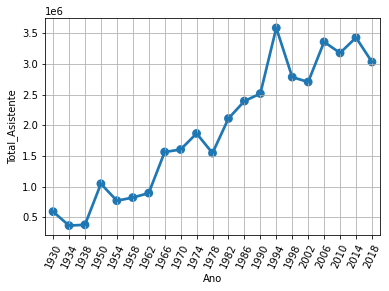

In [ ]:
#Exibindo o gráfico de linhas com marcação em cada ponto
sns.pointplot(x='Ano', y='Total_Asistente', data=df)

#Ajustando as legendas
plt.xticks(rotation=65)
plt.grid()
plt.show()

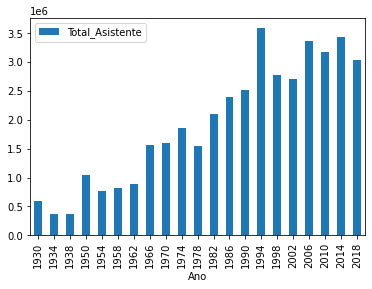

In [ ]:
df.plot.bar(x='Ano',y='Total_Asistente')